<a href="https://colab.research.google.com/github/Noob919/Feature_selection/blob/main/Models_EVALS_75%25/Cancer_75.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall tensorflow

Found existing installation: tensorflow 2.8.2+zzzcolab20220527125636
Uninstalling tensorflow-2.8.2+zzzcolab20220527125636:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.8.2+zzzcolab20220527125636.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
y
  Successfully uninstalled tensorflow-2.8.2+zzzcolab20220527125636


In [2]:
!pip install tensorflow==2.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 454.3 MB 15 kB/s 
     |████████████████████████████████| 462 kB 57.8 MB/s 
     |████████████████████████████████| 4.0 MB 40.1 MB/s 
     |████████████████████████████████| 132 kB 50.4 MB/s 
     |████████████████████████████████| 1.2 MB 46.9 MB/s 
     |████████████████████████████████| 14.8 MB 40.1 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68715 sha256=590efc70faad4c2121176a28d559c563238f0d93057691deb6312bff6ed51c6b
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.2.0
    Uninstalling typing-extensions-4.2.0:
      Successfully uninstalled typing-extensions-4.2.0
  Attempting uninstall: numpy
    Found existing installation: n

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import datasets, layers, models,Sequential

In [2]:
df = pd.read_csv("/content/cancer.csv")
df_new = df.drop(['id','Unnamed: 32'],axis =1)
df_new['diagnosis'] = LabelEncoder().fit_transform(df_new['diagnosis'])
y = df_new['diagnosis']

In [3]:
rank1 = pd.read_excel("/content/cancer_dataset_U.xlsx",sheet_name = "Chi_2").set_index('Attributes_Names')
df_chi = df_new[rank1[:23].index]
X_col =  df_chi
y = df_new['diagnosis']
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (455, 23)
Shape of testing data (114, 23)


In [4]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.956140350877193

In [5]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
accuracy_score(y_test,y_pred_svc)

0.9912280701754386

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(23, activation='relu', input_shape=(23,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(28, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 23)                552       
_________________________________________________________________
batch_normalization (BatchNo (None, 23)                92        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                480       
_________________________________________________________________
batch_normalization_1 (Batch (None, 20)                80        
_________________________________________________________________
dense_2 (Dense)              (None, 24)                504       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 24)                9

In [7]:
h = model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
15/15 [==============================] - 2s 21ms/step - loss: 0.7242 - accuracy: 0.6088 - val_loss: 0.6710 - val_accuracy: 0.6053
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 0.6648 - accuracy: 0.6703 - val_loss: 0.6346 - val_accuracy: 0.7719
Epoch 3/100
15/15 [==============================] - 0s 6ms/step - loss: 0.6660 - accuracy: 0.6637 - val_loss: 0.5934 - val_accuracy: 0.8860
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 0.6271 - accuracy: 0.6527 - val_loss: 0.5556 - val_accuracy: 0.9211
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5667 - accuracy: 0.6945 - val_loss: 0.5142 - val_accuracy: 0.9298
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.4883 - accuracy: 0.7538 - val_loss: 0.4711 - val_accuracy: 0.9561
Epoch 7/100
15/15 [==============================] - 0s 4ms/step - loss: 0.4803 - accuracy: 0.7758 - val_loss: 0.4280 - val_accuracy: 0.9474
Epoch 8/100


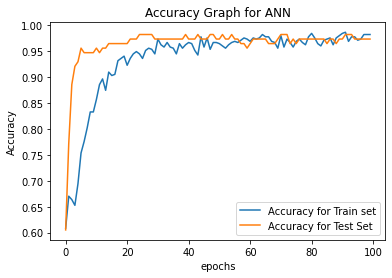

In [8]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

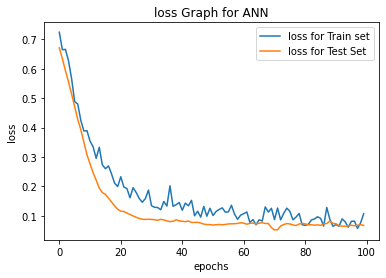

In [9]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [10]:
y_pred_ann = model.predict_classes(X_test)
accuracy_score(y_test,y_pred_ann)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9736842105263158

In [11]:
rank2  = pd.read_excel("/content/cancer_dataset_U.xlsx",sheet_name = "Tree_based_method").set_index('Attributes_Names')
df_tree = df_new[rank2[0:23].index]
X_col =  df_tree
y = df_new['diagnosis']
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (455, 23)
Shape of testing data (114, 23)


In [12]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.956140350877193

In [13]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
accuracy_score(y_test,y_pred_svc)

0.9824561403508771

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(23, activation='relu', input_shape=(23,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(28, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 23)                552       
_________________________________________________________________
batch_normalization_3 (Batch (None, 23)                92        
_________________________________________________________________
dense_6 (Dense)              (None, 20)                480       
_________________________________________________________________
batch_normalization_4 (Batch (None, 20)                80        
_________________________________________________________________
dense_7 (Dense)              (None, 24)                504       
_________________________________________________________________
dropout_2 (Dropout)          (None, 24)                0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 24)               

In [15]:
h = model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
15/15 [==============================] - 2s 18ms/step - loss: 0.9315 - accuracy: 0.4462 - val_loss: 0.7359 - val_accuracy: 0.3333
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 0.7689 - accuracy: 0.5473 - val_loss: 0.6865 - val_accuracy: 0.5877
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 0.7455 - accuracy: 0.5626 - val_loss: 0.6442 - val_accuracy: 0.6667
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5916 - accuracy: 0.6681 - val_loss: 0.5999 - val_accuracy: 0.7456
Epoch 5/100
15/15 [==============================] - 0s 6ms/step - loss: 0.5361 - accuracy: 0.7385 - val_loss: 0.5416 - val_accuracy: 0.7982
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.4874 - accuracy: 0.7890 - val_loss: 0.4783 - val_accuracy: 0.8421
Epoch 7/100
15/15 [==============================] - 0s 4ms/step - loss: 0.4398 - accuracy: 0.8484 - val_loss: 0.4274 - val_accuracy: 0.8947
Epoch 8/100


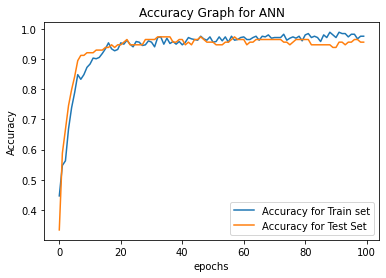

In [16]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

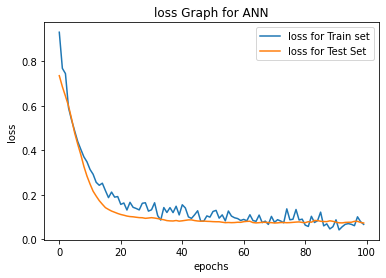

In [17]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [18]:
y_pred_ann = model.predict_classes(X_test)
accuracy_score(y_test,y_pred_ann)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.956140350877193

In [19]:
rank3  = pd.read_excel("/content/cancer_dataset_U.xlsx",sheet_name = "permutation_method_mean").set_index('Attributes_Names')
df_per_mean = df_new[rank3[0:23].index]
X_col =  df_per_mean
y = df_new['diagnosis']
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (455, 23)
Shape of testing data (114, 23)


In [20]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.9385964912280702

In [21]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
accuracy_score(y_test,y_pred_svc)

0.9736842105263158

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(23, activation='relu', input_shape=(23,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(28, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 23)                552       
_________________________________________________________________
batch_normalization_6 (Batch (None, 23)                92        
_________________________________________________________________
dense_11 (Dense)             (None, 20)                480       
_________________________________________________________________
batch_normalization_7 (Batch (None, 20)                80        
_________________________________________________________________
dense_12 (Dense)             (None, 24)                504       
_________________________________________________________________
dropout_4 (Dropout)          (None, 24)                0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 24)               

In [23]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
15/15 [==============================] - 1s 18ms/step - loss: 0.8191 - accuracy: 0.5165 - val_loss: 0.6576 - val_accuracy: 0.6491
Epoch 2/50
15/15 [==============================] - 0s 6ms/step - loss: 0.7085 - accuracy: 0.5780 - val_loss: 0.6346 - val_accuracy: 0.7281
Epoch 3/50
15/15 [==============================] - 0s 6ms/step - loss: 0.6435 - accuracy: 0.6440 - val_loss: 0.6117 - val_accuracy: 0.7807
Epoch 4/50
15/15 [==============================] - 0s 5ms/step - loss: 0.5827 - accuracy: 0.7077 - val_loss: 0.5846 - val_accuracy: 0.8158
Epoch 5/50
15/15 [==============================] - 0s 6ms/step - loss: 0.5456 - accuracy: 0.7363 - val_loss: 0.5497 - val_accuracy: 0.8772
Epoch 6/50
15/15 [==============================] - 0s 6ms/step - loss: 0.5237 - accuracy: 0.7560 - val_loss: 0.5086 - val_accuracy: 0.9035
Epoch 7/50
15/15 [==============================] - 0s 5ms/step - loss: 0.4749 - accuracy: 0.7890 - val_loss: 0.4702 - val_accuracy: 0.9035
Epoch 8/50
15/15 [=

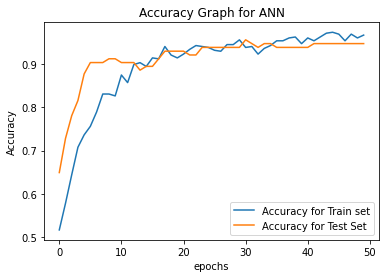

In [24]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

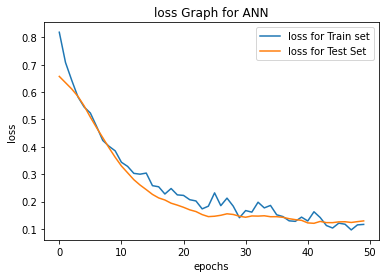

In [25]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [26]:
y_pred_ann = model.predict_classes(X_test)
accuracy_score(y_test,y_pred_ann)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9473684210526315

In [27]:
rank4  = pd.read_excel("/content/cancer_dataset_U.xlsx",sheet_name = "permutation_method_std").set_index('Attributes_Names')
df_per_std  = df_new[rank4[0:23].index]
X_col =  df_per_std
y = df_new['diagnosis']
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (455, 23)
Shape of testing data (114, 23)


In [28]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.9649122807017544

In [29]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
accuracy_score(y_test,y_pred_svc)

0.9736842105263158

In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(23, activation='relu', input_shape=(23,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(28, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 23)                552       
_________________________________________________________________
batch_normalization_9 (Batch (None, 23)                92        
_________________________________________________________________
dense_16 (Dense)             (None, 20)                480       
_________________________________________________________________
batch_normalization_10 (Batc (None, 20)                80        
_________________________________________________________________
dense_17 (Dense)             (None, 24)                504       
_________________________________________________________________
dropout_6 (Dropout)          (None, 24)                0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 24)               

In [31]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
15/15 [==============================] - 2s 19ms/step - loss: 0.8925 - accuracy: 0.4396 - val_loss: 0.6709 - val_accuracy: 0.7544
Epoch 2/50
15/15 [==============================] - 0s 5ms/step - loss: 0.7166 - accuracy: 0.5714 - val_loss: 0.6406 - val_accuracy: 0.8421
Epoch 3/50
15/15 [==============================] - 0s 4ms/step - loss: 0.7301 - accuracy: 0.5626 - val_loss: 0.6055 - val_accuracy: 0.8684
Epoch 4/50
15/15 [==============================] - 0s 5ms/step - loss: 0.5872 - accuracy: 0.6659 - val_loss: 0.5648 - val_accuracy: 0.8684
Epoch 5/50
15/15 [==============================] - 0s 4ms/step - loss: 0.5692 - accuracy: 0.6901 - val_loss: 0.5233 - val_accuracy: 0.8860
Epoch 6/50
15/15 [==============================] - 0s 5ms/step - loss: 0.4782 - accuracy: 0.7802 - val_loss: 0.4772 - val_accuracy: 0.9035
Epoch 7/50
15/15 [==============================] - 0s 4ms/step - loss: 0.4602 - accuracy: 0.7846 - val_loss: 0.4285 - val_accuracy: 0.9211
Epoch 8/50
15/15 [=

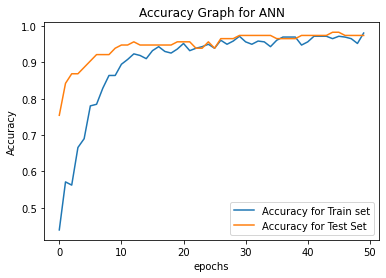

In [32]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

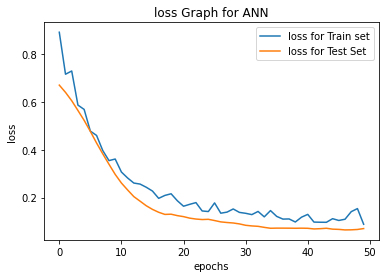

In [33]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [34]:
y_pred_ann = model.predict_classes(X_test)
accuracy_score(y_test,y_pred_ann)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9736842105263158

In [35]:
rank5  = pd.read_excel("/content/cancer_dataset_U.xlsx",sheet_name = "PCA").set_index('Attributes_Names')
df_pca  = df_new[rank5[:23].index]
X_col =  df_pca
y = df_new['diagnosis']
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (455, 23)
Shape of testing data (114, 23)


In [36]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.9649122807017544

In [37]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
accuracy_score(y_test,y_pred_svc)

0.9824561403508771

In [38]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(23, activation='relu', input_shape=(23,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(28, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 23)                552       
_________________________________________________________________
batch_normalization_12 (Batc (None, 23)                92        
_________________________________________________________________
dense_21 (Dense)             (None, 20)                480       
_________________________________________________________________
batch_normalization_13 (Batc (None, 20)                80        
_________________________________________________________________
dense_22 (Dense)             (None, 24)                504       
_________________________________________________________________
dropout_8 (Dropout)          (None, 24)                0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 24)               

In [39]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
15/15 [==============================] - 1s 19ms/step - loss: 0.6971 - accuracy: 0.6000 - val_loss: 0.6723 - val_accuracy: 0.5965
Epoch 2/50
15/15 [==============================] - 0s 5ms/step - loss: 0.6296 - accuracy: 0.6725 - val_loss: 0.6140 - val_accuracy: 0.7719
Epoch 3/50
15/15 [==============================] - 0s 5ms/step - loss: 0.5525 - accuracy: 0.7209 - val_loss: 0.5511 - val_accuracy: 0.8333
Epoch 4/50
15/15 [==============================] - 0s 4ms/step - loss: 0.4863 - accuracy: 0.7626 - val_loss: 0.4914 - val_accuracy: 0.8596
Epoch 5/50
15/15 [==============================] - 0s 6ms/step - loss: 0.4565 - accuracy: 0.7978 - val_loss: 0.4328 - val_accuracy: 0.8772
Epoch 6/50
15/15 [==============================] - 0s 5ms/step - loss: 0.4345 - accuracy: 0.8000 - val_loss: 0.3741 - val_accuracy: 0.8772
Epoch 7/50
15/15 [==============================] - 0s 4ms/step - loss: 0.3618 - accuracy: 0.8484 - val_loss: 0.3307 - val_accuracy: 0.8772
Epoch 8/50
15/15 [=

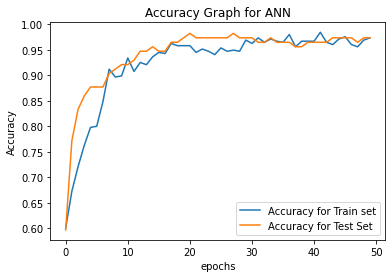

In [40]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

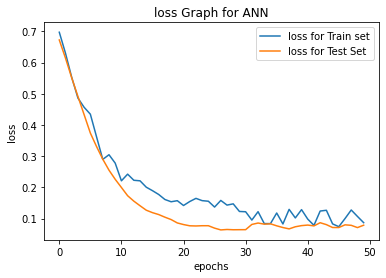

In [41]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [42]:
y_pred_ann = model.predict_classes(X_test)
accuracy_score(y_test,y_pred_ann)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9736842105263158

In [43]:
rank6  = pd.read_excel("/content/cancer_dataset_U.xlsx",sheet_name = "F_test").set_index('Attributes_Names')
df_f_test  = df_new[rank6[:23].index]
X_col =  df_f_test
y = df_new['diagnosis']
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (455, 23)
Shape of testing data (114, 23)


In [44]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.9473684210526315

In [45]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
accuracy_score(y_test,y_pred_svc)


0.9824561403508771

In [47]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(23, activation='relu', input_shape=(23,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(28, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 23)                552       
_________________________________________________________________
batch_normalization_18 (Batc (None, 23)                92        
_________________________________________________________________
dense_31 (Dense)             (None, 20)                480       
_________________________________________________________________
batch_normalization_19 (Batc (None, 20)                80        
_________________________________________________________________
dense_32 (Dense)             (None, 24)                504       
_________________________________________________________________
dropout_12 (Dropout)         (None, 24)                0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 24)               

In [48]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
15/15 [==============================] - 2s 34ms/step - loss: 0.7474 - accuracy: 0.5538 - val_loss: 0.5882 - val_accuracy: 0.7982
Epoch 2/50
15/15 [==============================] - 0s 9ms/step - loss: 0.6723 - accuracy: 0.5846 - val_loss: 0.5414 - val_accuracy: 0.8947
Epoch 3/50
15/15 [==============================] - 0s 12ms/step - loss: 0.5931 - accuracy: 0.6923 - val_loss: 0.4894 - val_accuracy: 0.9211
Epoch 4/50
15/15 [==============================] - 0s 9ms/step - loss: 0.5447 - accuracy: 0.7143 - val_loss: 0.4448 - val_accuracy: 0.9123
Epoch 5/50
15/15 [==============================] - 0s 7ms/step - loss: 0.4625 - accuracy: 0.7868 - val_loss: 0.3981 - val_accuracy: 0.9211
Epoch 6/50
15/15 [==============================] - 0s 7ms/step - loss: 0.4231 - accuracy: 0.8198 - val_loss: 0.3637 - val_accuracy: 0.8947
Epoch 7/50
15/15 [==============================] - 0s 9ms/step - loss: 0.4164 - accuracy: 0.8088 - val_loss: 0.3302 - val_accuracy: 0.9123
Epoch 8/50
15/15 [

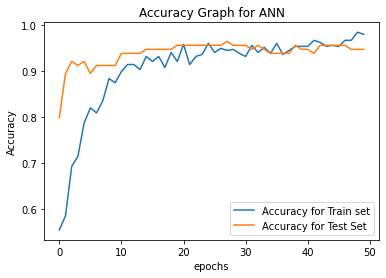

In [49]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

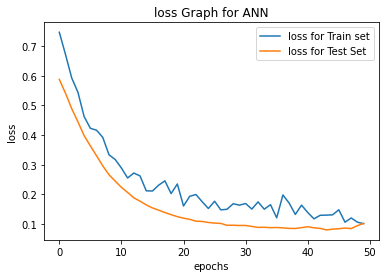

In [50]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [51]:
y_pred_ann = model.predict_classes(X_test)
accuracy_score(y_test,y_pred_ann)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9473684210526315

In [52]:
rank7  = pd.read_excel("/content/cancer_dataset_U.xlsx",sheet_name = "mutual_info").set_index('Attributes_Names')
df_mutual = df_new[rank7[:23].index]
X_col =  df_mutual
y = df_new['diagnosis']
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (455, 23)
Shape of testing data (114, 23)


In [53]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.9736842105263158

In [54]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
accuracy_score(y_test,y_pred_svc)

0.9824561403508771

In [55]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(23, activation='relu', input_shape=(23,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(28, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 23)                552       
_________________________________________________________________
batch_normalization_21 (Batc (None, 23)                92        
_________________________________________________________________
dense_36 (Dense)             (None, 20)                480       
_________________________________________________________________
batch_normalization_22 (Batc (None, 20)                80        
_________________________________________________________________
dense_37 (Dense)             (None, 24)                504       
_________________________________________________________________
dropout_14 (Dropout)         (None, 24)                0         
_________________________________________________________________
batch_normalization_23 (Batc (None, 24)               

In [56]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
15/15 [==============================] - 3s 36ms/step - loss: 0.8494 - accuracy: 0.4703 - val_loss: 0.6287 - val_accuracy: 0.8070
Epoch 2/50
15/15 [==============================] - 0s 9ms/step - loss: 0.6890 - accuracy: 0.5868 - val_loss: 0.5857 - val_accuracy: 0.8684
Epoch 3/50
15/15 [==============================] - 0s 10ms/step - loss: 0.5924 - accuracy: 0.6637 - val_loss: 0.5408 - val_accuracy: 0.8684
Epoch 4/50
15/15 [==============================] - 0s 10ms/step - loss: 0.5171 - accuracy: 0.7275 - val_loss: 0.4917 - val_accuracy: 0.8860
Epoch 5/50
15/15 [==============================] - 0s 9ms/step - loss: 0.4954 - accuracy: 0.7495 - val_loss: 0.4422 - val_accuracy: 0.8860
Epoch 6/50
15/15 [==============================] - 0s 9ms/step - loss: 0.3847 - accuracy: 0.8725 - val_loss: 0.3911 - val_accuracy: 0.9035
Epoch 7/50
15/15 [==============================] - 0s 9ms/step - loss: 0.3624 - accuracy: 0.8659 - val_loss: 0.3463 - val_accuracy: 0.9123
Epoch 8/50
15/15 

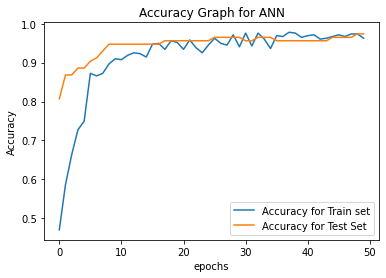

In [57]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

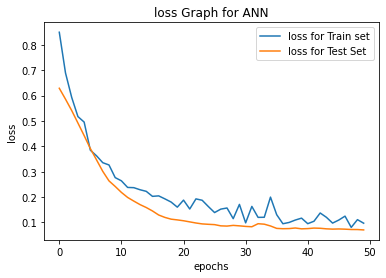

In [58]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [59]:
y_pred_ann = model.predict_classes(X_test)
accuracy_score(y_test,y_pred_ann)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9736842105263158

In [60]:
rank8  = pd.read_excel("/content/cancer_dataset_U.xlsx",sheet_name = "Pearson_Correlation").set_index('Attributes_Names')
df_pearson =  df_new[rank8[:23].index]
X_col =  df_pearson
y = df_new['diagnosis']
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (455, 23)
Shape of testing data (114, 23)


In [61]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.9736842105263158

In [62]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
accuracy_score(y_test,y_pred_svc)

0.9824561403508771

In [63]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(23, activation='relu', input_shape=(23,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(28, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 23)                552       
_________________________________________________________________
batch_normalization_24 (Batc (None, 23)                92        
_________________________________________________________________
dense_41 (Dense)             (None, 20)                480       
_________________________________________________________________
batch_normalization_25 (Batc (None, 20)                80        
_________________________________________________________________
dense_42 (Dense)             (None, 24)                504       
_________________________________________________________________
dropout_16 (Dropout)         (None, 24)                0         
_________________________________________________________________
batch_normalization_26 (Batc (None, 24)               

In [64]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
15/15 [==============================] - 2s 34ms/step - loss: 0.6865 - accuracy: 0.6198 - val_loss: 0.6513 - val_accuracy: 0.7807
Epoch 2/50
15/15 [==============================] - 0s 9ms/step - loss: 0.6385 - accuracy: 0.6593 - val_loss: 0.5933 - val_accuracy: 0.8772
Epoch 3/50
15/15 [==============================] - 0s 9ms/step - loss: 0.5012 - accuracy: 0.7648 - val_loss: 0.5426 - val_accuracy: 0.8860
Epoch 4/50
15/15 [==============================] - 0s 9ms/step - loss: 0.4548 - accuracy: 0.7934 - val_loss: 0.4949 - val_accuracy: 0.9035
Epoch 5/50
15/15 [==============================] - 0s 7ms/step - loss: 0.4044 - accuracy: 0.8462 - val_loss: 0.4408 - val_accuracy: 0.9123
Epoch 6/50
15/15 [==============================] - 0s 7ms/step - loss: 0.3589 - accuracy: 0.8571 - val_loss: 0.3838 - val_accuracy: 0.9035
Epoch 7/50
15/15 [==============================] - 0s 8ms/step - loss: 0.3618 - accuracy: 0.8374 - val_loss: 0.3284 - val_accuracy: 0.9211
Epoch 8/50
15/15 [=

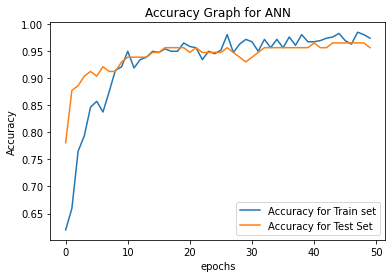

In [65]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

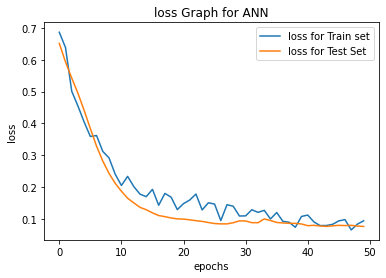

In [66]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [67]:
y_pred_ann = model.predict_classes(X_test)
accuracy_score(y_test,y_pred_ann)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.956140350877193

In [68]:
OWA =  rank8  = pd.read_excel("/content/cancer_dataset_U.xlsx",sheet_name = "OWA_method").set_index('Attributes_Name')

In [69]:
df_owa  = df_new[OWA[:23].index]

In [70]:
X_col =  df_owa
y = df_new['diagnosis']
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (455, 23)
Shape of testing data (114, 23)


In [71]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
pred =  rf.predict(X_test)
accuracy_score(y_test,pred)

0.956140350877193

In [72]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred =  svc.predict(X_test)
accuracy_score(y_test,y_pred)

0.9824561403508771

In [73]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(23, activation='relu', input_shape=(23,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(28, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 23)                552       
_________________________________________________________________
batch_normalization_27 (Batc (None, 23)                92        
_________________________________________________________________
dense_46 (Dense)             (None, 20)                480       
_________________________________________________________________
batch_normalization_28 (Batc (None, 20)                80        
_________________________________________________________________
dense_47 (Dense)             (None, 24)                504       
_________________________________________________________________
dropout_18 (Dropout)         (None, 24)                0         
_________________________________________________________________
batch_normalization_29 (Batc (None, 24)               

In [74]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
15/15 [==============================] - 3s 33ms/step - loss: 0.8105 - accuracy: 0.5670 - val_loss: 0.7149 - val_accuracy: 0.5877
Epoch 2/50
15/15 [==============================] - 0s 8ms/step - loss: 0.6617 - accuracy: 0.6374 - val_loss: 0.6635 - val_accuracy: 0.5789
Epoch 3/50
15/15 [==============================] - 0s 10ms/step - loss: 0.5955 - accuracy: 0.6791 - val_loss: 0.6204 - val_accuracy: 0.7456
Epoch 4/50
15/15 [==============================] - 0s 10ms/step - loss: 0.5366 - accuracy: 0.7429 - val_loss: 0.5759 - val_accuracy: 0.8772
Epoch 5/50
15/15 [==============================] - 0s 5ms/step - loss: 0.4865 - accuracy: 0.7560 - val_loss: 0.5287 - val_accuracy: 0.9211
Epoch 6/50
15/15 [==============================] - 0s 9ms/step - loss: 0.4710 - accuracy: 0.7736 - val_loss: 0.4811 - val_accuracy: 0.9298
Epoch 7/50
15/15 [==============================] - 0s 9ms/step - loss: 0.4143 - accuracy: 0.8220 - val_loss: 0.4342 - val_accuracy: 0.9211
Epoch 8/50
15/15 

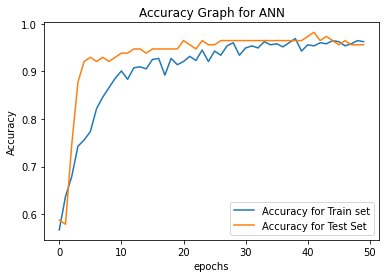

In [75]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

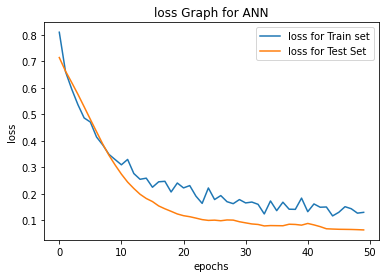

In [76]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [77]:
y_pred_ann_owa = model.predict_classes(X_test)
accuracy_score(y_test,y_pred_ann_owa)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.956140350877193